<a href="https://colab.research.google.com/github/Elygledson/deep_learning/blob/main/iris%20multiclass%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn, optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
torch.__version__

'2.0.1+cu118'

## Etapa 2: Base de dados

In [75]:
np.random.seed(123)
torch.manual_seed(123)

In [76]:
dataframe = pd.read_csv('Iris.csv')

In [77]:
dataframe.head()
dataframe.rename(columns={'Species': 'classe'}, inplace=True)

<Axes: ylabel='count'>

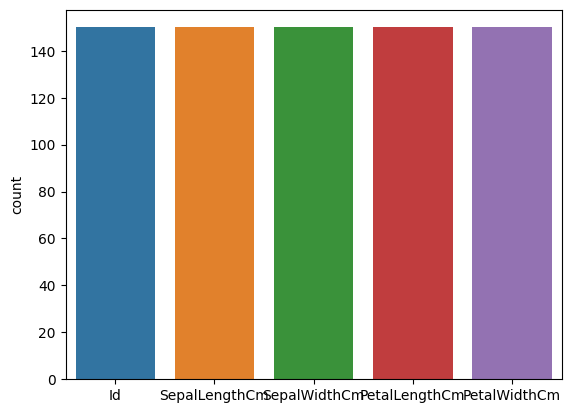

In [78]:
sns.countplot(dataframe)

In [79]:
dataframe.drop(columns=['Id'], inplace=True)
dataframe.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
features = dataframe.iloc[:, 0:4].values
classe = dataframe.iloc[:, 4].values

In [81]:
features.shape

(150, 4)

In [82]:
classe.shape

(150,)

In [83]:
classe

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [84]:
np.unique(dataframe['classe'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [85]:
encoder = LabelEncoder()
classe = encoder.fit_transform(classe)

In [86]:
np.unique(classe)

array([0, 1, 2])

In [87]:
features_training, features_test, classe_training, classe_test = train_test_split(features,classe,test_size=0.25)

In [88]:
features_training.shape

(112, 4)

In [89]:
features_test.shape

(38, 4)

In [90]:
classe_training.shape

(112,)

In [91]:
classe_test.shape

(38,)

In [92]:
type(features_training)

numpy.ndarray

In [93]:
features_training = torch.tensor(features_training, dtype = torch.float)
classe_training = torch.tensor(classe_training, dtype=torch.long)

In [94]:
type(features_training)

torch.Tensor

In [95]:
type(classe_training)

torch.Tensor

## Step 3: Building model

In [96]:
# 4 -> 4 -> 4 -> 3
# (entradas + saídas) / 2 = (4 + 3) / 2
classifier = nn.Sequential(
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 3)
)

In [97]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr = 0.001,
                       weight_decay = 0.0001)

In [98]:
dataset = torch.utils.data.TensorDataset(features_training, classe_training)
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle=True)

In [99]:
for epoch in range(2000):
  running_loss = 0.
  running_accuracy = 0.

  for data in train_loader:
    inputs, labels = data

    optimizer.zero_grad()

    outputs = classifier.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()

    outputs = F.softmax(outputs)
    top_p, top_class = outputs.topk(k = 1, dim = 1)

    equals = top_class == labels.view(*top_class.shape)

    running_accuracy += torch.mean(equals.type(torch.float))

    optimizer.step()

    running_loss += loss.item()

  print('Époch %3d: loss %.5f - accuracy %.5f' % (epoch + 1, running_loss/len(train_loader),
        running_accuracy/len(train_loader)))


<ipython-input-99-187c05cacc79>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = F.softmax(outputs)


Époch   1: loss 1.10335 - accuracy 0.35000
Époch   2: loss 1.10296 - accuracy 0.35000
Époch   3: loss 1.09251 - accuracy 0.41667
Époch   4: loss 1.09441 - accuracy 0.38333
Époch   5: loss 1.09427 - accuracy 0.38333
Époch   6: loss 1.09410 - accuracy 0.38333
Époch   7: loss 1.10717 - accuracy 0.35000
Époch   8: loss 1.10192 - accuracy 0.35000
Époch   9: loss 1.09412 - accuracy 0.38333
Époch  10: loss 1.10596 - accuracy 0.35000
Époch  11: loss 1.09790 - accuracy 0.38333
Époch  12: loss 1.09364 - accuracy 0.38333
Époch  13: loss 1.10490 - accuracy 0.35000
Époch  14: loss 1.10084 - accuracy 0.35000
Époch  15: loss 1.09343 - accuracy 0.38333
Époch  16: loss 1.10080 - accuracy 0.35000
Époch  17: loss 1.08956 - accuracy 0.41667
Époch  18: loss 1.10382 - accuracy 0.35000
Époch  19: loss 1.09338 - accuracy 0.38333
Époch  20: loss 1.09339 - accuracy 0.38333
Époch  21: loss 1.09605 - accuracy 0.38333
Époch  22: loss 1.09588 - accuracy 0.38333
Époch  23: loss 1.09324 - accuracy 0.38333
Époch  24: 

In [100]:
classifier.eval()

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
)

In [101]:
type(features_test)

numpy.ndarray

In [102]:
features_test = torch.tensor(features_test, dtype = torch.float)

In [104]:
predictions = classifier(features_test)

In [105]:
predictions

tensor([[-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
        [-0.0078,  0.2029,  0.0314],
 

In [106]:
F.softmax(predictions)

<ipython-input-106-4fee4aa54d81>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(predictions)


tensor([[0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.305

In [107]:
predictions = [np.argmax(t) for t in predictions.detach().numpy()]

In [108]:
predictions

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [109]:
matriz = confusion_matrix(predictions, classe_test)
matriz

array([[ 0,  0,  0],
       [16,  8, 14],
       [ 0,  0,  0]])

<Axes: >

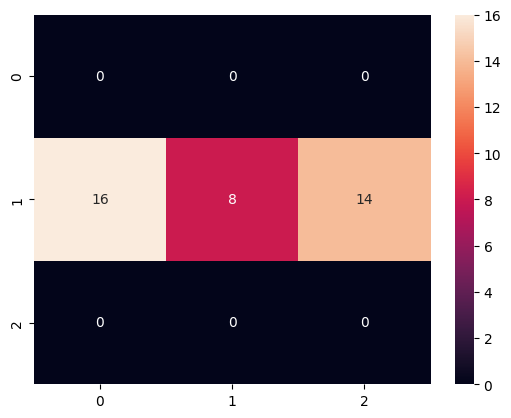

In [110]:
sns.heatmap(matriz, annot=True)